In [1]:
import pandas as pd
import numpy as np
import os

project_dir = "/home/julien/Documents/stage/data/ARDS"
pd.set_option('display.max_columns', None)

df_demo = pd.read_csv(os.path.join(project_dir, 'Demographics1081.csv'))
df_data = pd.read_csv(os.path.join(project_dir, 'processed_ARDS_data.csv'))
df = df_data.merge(df_demo,on=['patient_id', 'encounter_id'],how='left')
print(len(np.unique(df[df['ards']==1]['patient_id'])))
df = df[df['encounter_id']==1]
print(len(np.unique(df[df['ards']==1]['patient_id'])))
df['row_number'] = df.groupby('patient_id').cumcount()

220
216


In [2]:
def nan_percentage(group):
    return group.isna().mean() * 100
    
nan_percentage_per_patient = df.groupby(['patient_id']).apply(nan_percentage)
nan_percentage_per_patient = nan_percentage_per_patient.add_suffix('_nan_percentage').reset_index()


df_first_ards_time = df[df['ards'] == 1].groupby('patient_id').first().reset_index()
df_last_ards_time = df[df['ards'] == 1].groupby('patient_id').last().reset_index()

df_first_ards_time["ards_onset_time"] = df_first_ards_time['time']
df_first_ards_time["ards_onset_row"] = df_first_ards_time['row_number']
df_first_ards_time["last_time_of_patient"] = df_last_ards_time['time']
df_first_ards_time["last_row_of_patient"] = df_last_ards_time['row_number']

df_first_ards_time = df_first_ards_time[["patient_id", "ards_onset_time","ards_onset_row", "last_time_of_patient", "last_row_of_patient"]]
df_first_ards_time = df_first_ards_time.merge(nan_percentage_per_patient, on=["patient_id"], how="left")
df_first_ards_time[df_first_ards_time['ards_onset_row']>100].head(20)

,patient_id,ards_onset_time,ards_onset_row,last_time_of_patient,last_row_of_patient,patient_id_nan_percentage,encounter_id_nan_percentage,time_nan_percentage,AST_nan_percentage,Alb_nan_percentage,BNP_nan_percentage,BUN_nan_percentage,Cr_nan_percentage,HCO2_nan_percentage,Hgb_nan_percentage,INR_nan_percentage,K_nan_percentage,Na_nan_percentage,PEEP_nan_percentage,PTT_nan_percentage,Plat_nan_percentage,Plt_nan_percentage,RRobs_nan_percentage,RRset_nan_percentage,TP_nan_percentage,Tbili_nan_percentage,Vtobs_nan_percentage,Vtset_nan_percentage,WBC_nan_percentage,alert_nan_percentage,ards_nan_percentage,dbp_nan_percentage,dialysis_nan_percentage,dobu_nan_percentage,dopa_nan_percentage,epi_nan_percentage,ffp_transf_nan_percentage,fi02_nan_percentage,gcs_eye_nan_percentage,gcs_motor_nan_percentage,gcs_total_nan_percentage,gcs_verbal_nan_percentage,hfnc_nan_percentage,hr_nan_percentage,invasive_nan_percentage,iv_in_nan_percentage,lactate_nan_percentage,lipase_nan_percentage,mAirP_nan_percentage,mil_nan_percentage,noninvasive_nan_percentage,norepi_nan_percentage,oriented_nan_percentage,pCO2_nan_percentage,pH_nan_percentage,pO2_nan_percentage,pf_nan_percentage,pf_calc_nan_percentage,phenyl_nan_percentage,plt_transf_nan_percentage,rass_nan_percentage,rbc_transf_nan_percentage,rr_nan_percentage,sbp_nan_percentage,sedated_nan_percentage,sp02_nan_percentage,supl_nan_percentage,temp_nan_percentage,total_in_nan_percentage,total_out_nan_percentage,trop_nan_percentage,unresponsive_nan_percentage,urine_out_nan_percentage,vasso_nan_percentage,age_nan_percentage,row_number_nan_percentage
7,100001042,48.000000,176,99.183333,303,0.0,0.0,0.0,0.657895,0.657895,0.657895,0.657895,0.657895,0.657895,0.657895,0.657895,0.657895,0.657895,4.276316,0.657895,4.934211,0.657895,4.934211,4.276316,0.657895,0.657895,4.934211,4.276316,0.657895,1.315789,0.0,0.000000,0.986842,100.0,100.0,100.000000,0.986842,0.000000,1.315789,1.315789,1.315789,1.315789,100.000000,0.000000,0.000000,0.986842,0.657895,7.894737,4.934211,100.0,0.000000,0.328947,1.315789,10.197368,0.657895,10.197368,10.197368,0.000000,100.000000,0.986842,6.907895,0.986842,0.000000,0.000000,1.315789,0.000000,0.000000,0.000000,0.986842,0.986842,58.552632,1.315789,0.986842,100.000000,0.0,0.0
12,100001062,36.633333,137,897.633333,1699,0.0,0.0,0.0,5.294118,5.294118,100.000000,0.294118,0.294118,0.294118,0.294118,1.529412,0.294118,0.294118,0.117647,1.529412,0.117647,0.294118,0.117647,0.117647,5.294118,5.294118,0.117647,0.117647,0.294118,0.058824,0.0,0.176471,1.235294,100.0,100.0,100.000000,1.235294,0.117647,0.000000,0.000000,0.000000,0.000000,81.000000,0.117647,0.117647,1.235294,0.235294,33.058824,0.117647,100.0,0.117647,6.764706,31.235294,1.352941,0.235294,1.352941,1.352941,2.117647,100.000000,1.235294,0.235294,1.235294,0.117647,0.176471,0.058824,0.117647,0.117647,1.176471,1.235294,1.235294,100.000000,0.058824,1.235294,63.823529,0.0,0.0
15,100001074,127.800000,113,1537.100000,2509,0.0,0.0,0.0,0.039841,0.039841,100.000000,0.039841,0.039841,0.039841,0.039841,0.039841,0.039841,0.039841,4.462151,0.039841,4.462151,0.039841,4.462151,4.462151,0.039841,0.039841,4.462151,4.462151,0.039841,0.159363,0.0,0.000000,0.398406,100.0,100.0,100.000000,0.398406,0.000000,0.159363,0.159363,0.159363,0.159363,6.852590,0.000000,0.000000,0.398406,1.513944,0.039841,4.462151,100.0,0.000000,100.000000,0.159363,1.513944,1.513944,1.513944,1.513944,0.000000,100.000000,0.398406,3.745020,0.398406,0.000000,0.000000,0.159363,0.000000,0.000000,0.000000,0.398406,0.398406,3.027888,0.159363,0.398406,100.000000,0.0,0.0
16,100001085,132.583333,139,482.266667,611,0.0,0.0,0.0,8.496732,25.163399,20.098039,0.326797,0.326797,0.326797,0.326797,0.326797,0.326797,0.326797,23.366013,0.326797,30.718954,0.326797,23.366013,28.921569,25.163399,8.496732,23.366013,28.921569,0.326797,100.000000,0.0,0.000000,2.450980,100.0,100.0,100.000000,2.450980,0.000000,0.980392,0.980392,0.980392,0.980392,22.385621,0.000000,0.000000,2.450980,20.261438,100.000000,23.366013,100.0,0.00000

In [3]:
patient_id = 100001908
patient_id = 100001042
patient_id = 100001160
patient_id = 100001111
print("ARDS onset at row and time :", df_first_ards_time[df_first_ards_time["patient_id"]==patient_id][["ards_onset_row", "ards_onset_time"]].to_string(header=False,index=False))
df_patient = df[df['patient_id']==patient_id]
patient_id_first_ards_time = df_first_ards_time[df_first_ards_time["patient_id"]==patient_id]
max_nan_percentage = 10
columns_to_drop = (patient_id_first_ards_time.drop(['last_time_of_patient', 'ards_onset_time', 'patient_id', 'ards_onset_row', 'last_row_of_patient'], axis=1) > max_nan_percentage).to_dict(orient='records')[0]
columns_to_drop = [column_to_drop[:-15] for column_to_drop, to_drop in columns_to_drop.items() if to_drop]
df_patient = df_patient.drop(columns_to_drop, axis=1).reset_index().drop(["index"], axis=1)
df_patient
#columns_to_drop = df_first_ards_time[(df_first_ards_time["patient_id"]==patient_id)].column()

ARDS onset at row and time : 178 133.783333


,patient_id,encounter_id,time,AST,Alb,BNP,BUN,Cr,HCO2,Hgb,INR,K,Na,PTT,Plt,TP,Tbili,WBC,ards,dbp,dialysis,ffp_transf,fi02,gcs_eye,gcs_motor,gcs_total,gcs_verbal,hr,invasive,iv_in,noninvasive,pf_calc,plt_transf,rbc_transf,rr,sbp,sp02,supl,temp,total_in,total_out,trop,urine_out,age,row_number
0,100001111,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,0.0,NaN,0.0,NaN,NaN,NaN,16.0,144.0,96.0,1.0,97.9,NaN,NaN,NaN,NaN,67,0
1,100001111,1,0.283333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,66.0,NaN,NaN,NaN,4.0,6.0,15.0,5.0,102.0,0.0,NaN,0.0,NaN,NaN,NaN,16.0,144.0,96.0,1.0,97.9,NaN,NaN,NaN,NaN,67,1
2,100001111,1,0.516667,28.0,3.1,NaN,29.0,2.16,20.0,7.3,1.0,4.2,137.0,29.9,80.0,6.7,0.4,2.2,0.0,66.0,NaN,NaN,NaN,4.0,6.0,15.0,5.0,102.0,0.0,NaN,0.0,NaN,NaN,NaN,16.0,144.0,96.0,1.0,97.9,NaN,NaN,NaN,NaN,67,2
3,100001111,1,0.950000,28.0,3.1,NaN,29.0,2.16,20.0,7.3,1.0,4.2,137.0,29.9,80.0,6.7,0.4,2.2,0.0,66.0,NaN,NaN,NaN,4.0,6.0,15.0,5.0,102.0,0.0,NaN,0.0,NaN,NaN,NaN,16.0,144.0,96.0,1.0,97.9,NaN,NaN,0.0,NaN,67,3
4,100001111,1,2.883333,28.0,3.1,NaN,29.0,2.16,20.0,7.3,1.0,4.2,137.0,29.9,80.0,6.7,0.4,2.2,0.0,63.0,NaN,NaN,NaN,4.0,6.0,15.0,5.0,102.0,0.0,NaN,0.0,NaN,NaN,NaN,18.0,137.0,95.0,1.0,99.0,NaN,NaN,0.0,NaN,67,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,100001111,1,379.200000,39.0,2.2,241.0,9.0,1.23,35.0,9.5,1.0,3.7,143.0,31.1,101.0,4.4,0.6,4.1,1.0,57.0,0.0,0.0,24.0,4.0,6.0,15.0,5.0,82.0,0.0,286.95999,0.0,318.0,0.0,0.0,20.0,117.0,95.0,1.0,98.6,286.95999,0.0,0.0,0.0,67,471
472,100001111,1,380.683333,39.0,2.2,241.0,9.0,1.23,35.0,9.5,1.0,3.7,143.0,31.1,101.0,4.4,0.6,4.1,1.0,62.0,0.0,0.0,24.0,4.0,6.0,15.0,5.0,75.0,0.0,286.95999,0.0,318.0,0.0,0.0,20.0,122.0,95.0,1.0,99.0,286.95999,0.0,0.0,0.0,67,472
473,100001111,1,380.716667,39.0,2.2,241.0,9.0,1.27,34.0,9.4,1.0,3.8,144.0,31.1,101.0,4.4,0.6,3.2,1.0,62.0,0.0,0.0,24.0,4.0,6.0,15.0,5.0,75.0,0.0,286.95999,0.0,318.0,0.0,0.0,20.0,122.0,95.0,1.0,99.0,286.95999,0.0,0.0,0.0,67,473
474,100001111,1,381.950000,39.0,2.2,241.0,9.0,1.27,34.0,9.4,1.0,3.8,144.0,31.1,101.0,4.4,0.6,3.2,1.0,62.0,0.0,0.0,24.0,4.0,6.0,15.0,5.0,75.0,0.0,0.00000,0.0,318.0,0.0,0.0,20.0,122.0,95.0,1.0,99.0,240.00000,0.0,0.0,0.0,67,474


In [4]:
first_valid_indices = pd.DataFrame({col: df_patient[col].first_valid_index() for col in df_patient.columns}, index=[0])
first_valid_index = np.max(first_valid_indices)
print(first_valid_index)
df_patient = df_patient.iloc[first_valid_index:].reset_index()
first_valid_indices

16


,patient_id,encounter_id,time,AST,Alb,BNP,BUN,Cr,HCO2,Hgb,INR,K,Na,PTT,Plt,TP,Tbili,WBC,ards,dbp,dialysis,ffp_transf,fi02,gcs_eye,gcs_motor,gcs_total,gcs_verbal,hr,invasive,iv_in,noninvasive,pf_calc,plt_transf,rbc_transf,rr,sbp,sp02,supl,temp,total_in,total_out,trop,urine_out,age,row_number
0,0,0,0,2,2,16,2,2,2,2,2,2,2,2,2,2,2,2,0,0,9,9,7,1,1,1,1,0,0,9,0,7,9,9,0,0,0,0,0,9,9,3,9,0,0


In [5]:
df_patient

,index,patient_id,encounter_id,time,AST,Alb,BNP,BUN,Cr,HCO2,Hgb,INR,K,Na,PTT,Plt,TP,Tbili,WBC,ards,dbp,dialysis,ffp_transf,fi02,gcs_eye,gcs_motor,gcs_total,gcs_verbal,hr,invasive,iv_in,noninvasive,pf_calc,plt_transf,rbc_transf,rr,sbp,sp02,supl,temp,total_in,total_out,trop,urine_out,age,row_number
0,16,100001111,1,9.550000,28.0,3.1,241.0,29.0,2.16,20.0,7.9,1.0,4.2,137.0,29.0,58.0,6.7,0.4,1.3,0.0,63.0,0.0,0.0,21.0,4.0,6.0,15.0,5.0,99.0,0.0,100.00000,0.0,341.0,0.0,0.0,18.0,134.0,97.0,1.0,99.0,100.00000,200.0,0.0,200.0,67,16
1,17,100001111,1,9.950000,28.0,3.1,241.0,29.0,2.16,20.0,7.9,1.0,4.2,137.0,29.0,58.0,6.7,0.4,1.3,0.0,63.0,0.0,0.0,21.0,4.0,6.0,15.0,5.0,99.0,0.0,0.00000,0.0,341.0,0.0,0.0,18.0,134.0,97.0,1.0,99.0,200.00000,0.0,0.0,0.0,67,17
2,18,100001111,1,12.700000,28.0,3.1,241.0,29.0,2.16,20.0,7.9,1.0,4.2,137.0,29.0,58.0,6.7,0.4,1.3,0.0,63.0,0.0,0.0,21.0,4.0,6.0,15.0,5.0,99.0,0.0,623.33002,0.0,341.0,0.0,0.0,18.0,134.0,97.0,1.0,99.0,623.33002,0.0,0.0,0.0,67,18
3,19,100001111,1,13.100000,28.0,3.1,241.0,29.0,2.16,20.0,7.9,1.0,4.2,137.0,29.0,58.0,6.7,0.4,1.3,0.0,73.0,0.0,0.0,21.0,4.0,6.0,15.0,5.0,80.0,0.0,623.33002,0.0,393.0,0.0,0.0,18.0,156.0,96.0,1.0,98.6,623.33002,0.0,0.0,0.0,67,19
4,20,100001111,1,13.733333,28.0,3.1,241.0,29.0,2.16,20.0,7.9,1.0,4.2,137.0,29.0,58.0,6.7,0.4,1.3,0.0,73.0,0.0,0.0,21.0,4.0,6.0,15.0,5.0,80.0,0.0,100.00000,0.0,393.0,0.0,0.0,18.0,156.0,96.0,1.0,98.6,300.00000,0.0,0.0,0.0,67,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,471,100001111,1,379.200000,39.0,2.2,241.0,9.0,1.23,35.0,9.5,1.0,3.7,143.0,31.1,101.0,4.4,0.6,4.1,1.0,57.0,0.0,0.0,24.0,4.0,6.0,15.0,5.0,82.0,0.0,286.95999,0.0,318.0,0.0,0.0,20.0,117.0,95.0,1.0,98.6,286.95999,0.0,0.0,0.0,67,471
456,472,100001111,1,380.683333,39.0,2.2,241.0,9.0,1.23,35.0,9.5,1.0,3.7,143.0,31.1,101.0,4.4,0.6,4.1,1.0,62.0,0.0,0.0,24.0,4.0,6.0,15.0,5.0,75.0,0.0,286.95999,0.0,318.0,0.0,0.0,20.0,122.0,95.0,1.0,99.0,286.95999,0.0,0.0,0.0,67,472
457,473,100001111,1,380.716667,39.0,2.2,241.0,9.0,1.27,34.0,9.4,1.0,3.8,144.0,31.1,101.0,4.4,0.6,3.2,1.0,62.0,0.0,0.0,24.0,4.0,6.0,15.0,5.0,75.0,0.0,286.95999,0.0,318.0,0.0,0.0,20.0,122.0,95.0,1.0,99.0,286.95999,0.0,0.0,0.0,67,473
458,474,100001111,1,381.950000,39.0,2.2,241.0,9.0,1.27,34.0,9.4,1.0,3.8,144.0,31.1,101.0,4.4,0.6,3.2,1.0,62.0,0.0,0.0,24.0,4.0,6.0,15.0,5.0,75.0,0.0,0.00000,0.0,318.0,0.0,0.0,20.0,122.0,95.0,1.0,99.0,240.00000,0.0,0.0,0.0,67,474


In [6]:
ards_onset_time = df_patient[df_patient["ards"]==1].time.iloc[0]
ards_onset_time

133.78333333333333

In [7]:
df_interest_start = 30
window_length = 30
n_windows = 30

def get_window(df, start, length):
    return 

fit_data = df_patient.iloc[df_interest_start:df_interest_start+100]

In [8]:
from sklearn.mixture import GaussianMixture
n_components = 10
gm = GaussianMixture(n_components=n_components, random_state=0).fit(fit_data)

In [9]:
import matplotlib.pyplot as plt

len_scores = len(df_patient)-window_length-df_interest_start
scores = [0]*len_scores
for i in range(len_scores):
    scores[i] = gm.score(df_patient.iloc[df_interest_start+i:df_interest_start+i+window_length])

Text(0, 0.5, 'log_likelyhood')

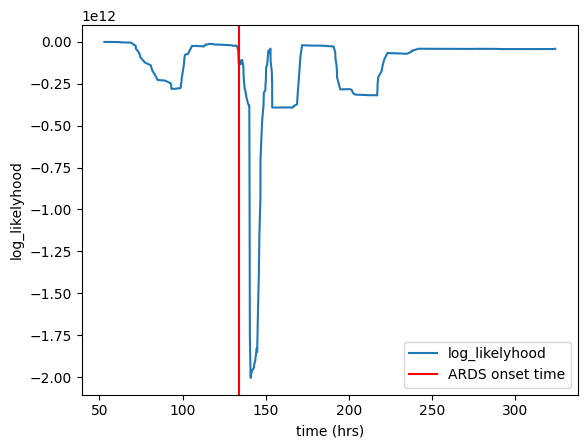

In [10]:
plt.plot(df_patient["time"].iloc[df_interest_start:-window_length], scores, label="log_likelyhood")
plt.axvline(ards_onset_time, color="r", label="ARDS onset time")
plt.legend()
plt.xlabel("time (hrs)")
plt.ylabel("log_likelyhood")
